In [1]:
from gen import *

In [34]:
#(1) define partial order (example w/ 2 disconnected components)
po = np.array([1,2,2,3,2,4,3,5,4,6,7,3, 7,5,1,4,  8,9])-1 #10,11
print(po)

[0 1 1 2 1 3 2 4 3 5 6 2 6 4 0 3 7 8]


In [2]:
#n=8 partial order
po=np.array([1, 3, 1, 4, 2, 4, 2, 5, 3, 5])-1
print(po)

[0 2 0 3 1 3 1 4 2 4]


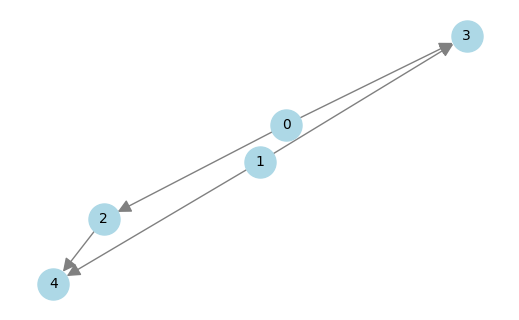

In [3]:
#visualize (optional)
graph = edges_to_adjacency_list(po)
graph_comps = [edges_to_adjacency_list(i) for i in po_groups(po)] #list(map(lambda i: edges_to_adjacency_list(i), po_sorted))
visualize_graph(graph, (5,3))

In [14]:
#I think make this into a class w/ phi below
group_pos = po_groups(po)
group_nodes =[np.sort(np.unique(i)) for i in group_pos] #segment fixed node order
nodes = np.arange(np.max(po)+1)

#canonical perms is the list of permutations allowed for the fixed node labeling 0...n.
canonical_perms = fixed_perms(group_pos, group_nodes)
print("fixed-order (1..n) permutations: ", canonical_perms)

#composite is the list of possible node labelings (up to combination),
combination_labels = comb_labelings(nodes, group_nodes)
print("node labels (up to combination): ", combination_labels)

group nodes:  [array([0, 1, 2, 3, 4])]
0
chains [[0], [1], [2], [3], [4]]
legal value factors
[[[0, 1, 2, 3, 4], [0, 1, 2, 4, 3], [0, 1, 3, 2, 4], [0, 2, 1, 3, 4], [0, 2, 1, 4, 3], [1, 0, 2, 3, 4], [1, 0, 2, 4, 3], [1, 0, 3, 2, 4]]] 

canonical perms  8
fixed-order (1..n) permutations:  [[0, 1, 2, 3, 4], [0, 1, 2, 4, 3], [0, 1, 3, 2, 4], [0, 2, 1, 3, 4], [0, 2, 1, 4, 3], [1, 0, 2, 3, 4], [1, 0, 2, 4, 3], [1, 0, 3, 2, 4]]
[0 1 2 3 4]
subsets:  1 [0 1 2 3 4]
products:  1 [[0, 1, 2, 3, 4]]
remainder:  1   [[]]
composite:  1   [[0, 1, 2, 3, 4]] 

node labels (up to combination):  [[0, 1, 2, 3, 4]]


In [4]:
group_pos = po_groups(po)
group_nodes =[np.sort(np.unique(i)) for i in group_pos] #segment fixed node order
nodes = np.arange(np.max(po)+1)

get_phi(nodes, group_pos, group_nodes)

group nodes:  [array([0, 1, 2, 3, 4])]
0
chains [[0], [1], [2], [3], [4]]
legal value factors
[[[0, 1, 2, 3, 4], [0, 1, 2, 4, 3], [0, 1, 3, 2, 4], [0, 2, 1, 3, 4], [0, 2, 1, 4, 3], [1, 0, 2, 3, 4], [1, 0, 2, 4, 3], [1, 0, 3, 2, 4]]] 

canonical perms  8
fixed-order (1..n) permutations:  [[0, 1, 2, 3, 4], [0, 1, 2, 4, 3], [0, 1, 3, 2, 4], [0, 2, 1, 3, 4], [0, 2, 1, 4, 3], [1, 0, 2, 3, 4], [1, 0, 2, 4, 3], [1, 0, 3, 2, 4]]
[0 1 2 3 4]
subsets:  1 [0 1 2 3 4]
products:  1 [[0, 1, 2, 3, 4]]
remainder:  1   [[]]
composite:  1   [[0, 1, 2, 3, 4]] 

node labels (up to combination):  [[0, 1, 2, 3, 4]]


[array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 4, 3]),
 array([0, 1, 3, 2, 4]),
 array([0, 2, 1, 3, 4]),
 array([0, 2, 1, 4, 3]),
 array([1, 0, 2, 3, 4]),
 array([1, 0, 2, 4, 3]),
 array([1, 0, 3, 2, 4])]

In [98]:
#make identity the first index just as a rule of thumb if it's in there
#swap it with index 0 (no if statement needed)
phi

[array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 4, 3]),
 array([0, 1, 3, 2, 4]),
 array([0, 2, 1, 3, 4]),
 array([0, 2, 1, 4, 3]),
 array([1, 0, 2, 3, 4]),
 array([1, 0, 2, 4, 3]),
 array([1, 0, 3, 2, 4])]

In [17]:
phi_inv = [perm_inverse(i) for i in phi]
phi_inv

[array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 4, 3]),
 array([0, 1, 3, 2, 4]),
 array([0, 2, 1, 3, 4]),
 array([0, 2, 1, 4, 3]),
 array([1, 0, 2, 3, 4]),
 array([1, 0, 2, 4, 3]),
 array([1, 0, 3, 2, 4])]

In [21]:
nodes[phi[0]][phi_inv[0]]

array([0, 1, 2, 3, 4])

In [36]:
lst = [1]
np.isin(lst,1)[0]

True

In [61]:
def filtrate(perm):
    sd=[]
    for i in range(len(perm)-1):
        dif = perm[i+1]-perm[i]
        sd.append(int((dif/np.abs(dif) + 1) / 2))
    return tuple(sd)

In [96]:
# ex=np.array([1,2,3])
# np.where(ex==1,ex,0)
ex=np.array([(1,1),(2,2),(3,3)])
#ex=[(1,1),(2,2),(3,3)]
np.where(ex==(1,1),ex,0) #use index of
#could make my own comparator that sorts by sum and breaks ties by index sum or something

array([[1, 1],
       [0, 0],
       [0, 0]])

In [82]:
np.where((0,1,0,1),list(keys))

ValueError: either both or neither of x and y should be given

In [73]:
import sympy as sp

n=len(phi)
s=sp.symbols("x_0:{}".format(len(phi)))
#uniques = []
def genmat(phi, n, nodes):
    A = [0]*(n*n)
    for i in range(n):
        for j in range(n):
            A[n*i + j] = filtrate(tuple(nodes[phi[i]][phi_inv[j]])) #remember order of application
            #if (!np.isin(uniques,A[n*i + j])[0]):
    return A

A = genmat(phi, n, nodes)
print(len(set(A)))
print(A)
keys = set(A) # make 1111 x0 if it's in there
subs = {k: v for k, v in zip(set(A), s)}
print(subs)
# print(np.unique(A))
# # subs[A[0]]
A = sp.Matrix([subs[i] for i in A]).reshape(n,n)
A

8
[(1, 1, 1, 1), (1, 1, 1, 0), (1, 1, 0, 1), (1, 0, 1, 1), (1, 0, 1, 0), (0, 1, 1, 1), (0, 1, 1, 0), (0, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (0, 1, 1, 0), (0, 1, 1, 1), (0, 1, 0, 1), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1), (1, 0, 1, 1), (1, 0, 1, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (1, 0, 1, 1), (1, 0, 1, 0), (1, 1, 0, 1), (1, 1, 1, 1), (1, 1, 1, 0), (0, 1, 1, 1), (0, 1, 1, 0), (0, 1, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1), (0, 1, 1, 0), (0, 1, 1, 1), (0, 1, 0, 1), (0, 1, 1, 1), (0, 1, 1, 0), (0, 1, 0, 1), (1, 0, 1, 1), (1, 0, 1, 0), (1, 1, 1, 1), (1, 1, 1, 0), (1, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (0, 1, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 1, 0), (1, 1, 1, 1), (1, 1, 0, 1), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1), (1, 0, 1, 1), (1, 0, 1, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)]
{(0, 1, 0, 1): x_0, (0, 1, 1, 1): x_1, (1, 0, 1, 1): x_2, (1, 1, 1, 0): x_3, (0, 1, 1, 0): x_4, (1, 0

Matrix([
[x_7, x_3, x_6, x_2, x_5, x_1, x_4, x_0],
[x_3, x_7, x_6, x_5, x_2, x_4, x_1, x_0],
[x_6, x_3, x_7, x_2, x_5, x_0, x_4, x_1],
[x_2, x_5, x_6, x_7, x_3, x_1, x_4, x_0],
[x_5, x_2, x_6, x_3, x_7, x_4, x_1, x_0],
[x_1, x_4, x_0, x_2, x_5, x_7, x_3, x_6],
[x_4, x_1, x_0, x_5, x_2, x_3, x_7, x_6],
[x_0, x_4, x_1, x_2, x_5, x_6, x_3, x_7]])

In [ ]:
A = genmat(ress, n, nodes)

In [ ]:
A = (([0]*(nodes-1))*np.array([[0] for i in range(n*n)])).reshape(n,n,nodes-1)